In [7]:
azure_storage_account_name = "uwclddata230public"
azure_storage_account_key = "SoDTkHaHdxAVoRQtjtsqh0gX3RgQc0oKJuAkAXaWA4Urd+9Mj7mPeaBclk0F9dOowzMYfOuS9ktfwnrrF/+IwQ=="

if azure_storage_account_name is None or azure_storage_account_key is None:
    raise Exception("You must provide a name and key for an Azure Storage account")

In [8]:
!pip install azure-storage==0.32.0

You are using pip version 8.0.3, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
from azure.storage.blob import BlockBlobService

blob_service = BlockBlobService(azure_storage_account_name, azure_storage_account_key)

blob_service.get_blob_to_path('azure-notebooks-data', 'sample.txt', 'sample.txt')

!cat sample.txt

your text file content would go here

In [14]:
blob_service.get_blob_to_path('week05hw', 'nba_2013.csv', 'nba_2013.csv')

!cat nba_2013.csv

player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266666666666667,62,126,0.492063492063492,0.482,35,53,0.66,72,144,216,28,23,26,30,122,171,2013-2014,2013
Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NA,93,185,0.502702702702703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.52,0,0,NA,143,275,0.52,0.52,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426666666666667,336,711,0.472573839662447,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0,136,248,0.548387096774194,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NA,33,61,0.540983606557377,0.541,26,30,0.867,37,92,129,14,8,30,18,40

In [15]:
import pandas
nba = pandas.read_csv("nba_2013.csv")

In [16]:
nba.shape

(481, 31)

In [17]:
nba.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013


In [18]:
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

:0: FutureWarning: IPython widgets are experimental and may change in the future.


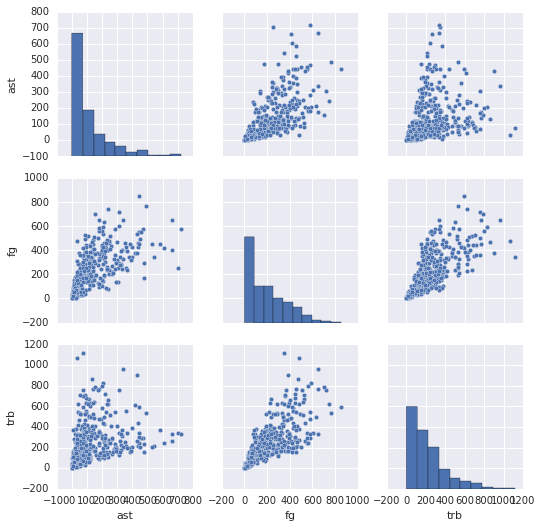

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(nba[["ast", "fg", "trb"]])
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

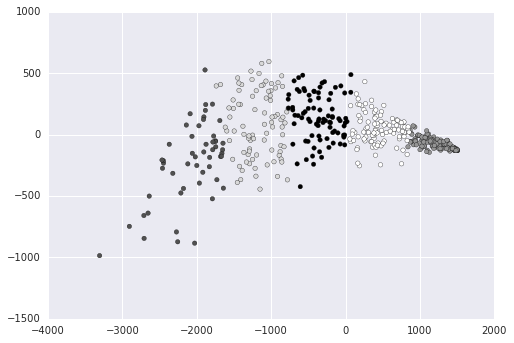

In [21]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [22]:
train = nba.sample(frac=0.8, random_state=1)
test = nba.loc[~nba.index.isin(train.index)]

AttributeError: 'DataFrame' object has no attribute 'sample'

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[["fg"]], train["ast"])
predictions = lr.predict(test[["fg"]])

NameError: name 'train' is not defined

In [24]:
import statsmodels.formula.api as sm
model = sm.ols(formula='ast ~ fga', data=train)
fitted = model.fit()
fitted.summary()

NameError: name 'train' is not defined

In [25]:
from sklearn.ensemble import RandomForestRegressor
predictor_columns = ["age", "mp", "fg", "trb", "stl", "blk"]
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(train[predictor_columns], train["ast"])
predictions = rf.predict(test[predictor_columns])

NameError: name 'train' is not defined

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["ast"], predictions)

NameError: name 'test' is not defined

In [32]:
import requests
url = "http://www.basketball-reference.com/boxscores/201506140GSW.html"
data = requests.get(url).content

In [28]:
from bs4 import BeautifulSoup
import re
soup = BeautifulSoup(data, 'html.parser')
box_scores = []
for tag in soup.find_all(id=re.compile("[A-Z]{3,}_basic")):
    rows = []
    for i, row in enumerate(tag.find_all("tr")):
        if i == 0:
            continue
        elif i == 1:
            tag = "th"
        else:
            tag = "td"
        row_data = [item.get_text() for item in row.find_all(tag)]
        rows.append(row_data)
    box_scores.append(rows)

In [30]:
data

b'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\n<html><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>ERROR: The requested URL could not be retrieved</title>\n<style type="text/css"><!--\n /*\n Stylesheet for Squid Error pages\n Adapted from design by Free CSS Templates\n http://www.freecsstemplates.org\n Released for free under a Creative Commons Attribution 2.5 License\n*/\n\n/* Page basics */\n* {\n\tfont-family: verdana, sans-serif;\n}\n\nhtml body {\n\tmargin: 0;\n\tpadding: 0;\n\tbackground: #efefef;\n\tfont-size: 12px;\n\tcolor: #1e1e1e;\n}\n\n/* Page displayed title area */\n#titles {\n\tmargin-left: 15px;\n\tpadding: 10px;\n\tpadding-left: 100px;\n\tbackground: url(\'http://www.squid-cache.org/Artwork/SN.png\') no-repeat left;\n}\n\n/* initial title */\n#titles h1 {\n\tcolor: #000000;\n}\n#titles h2 {\n\tcolor: #000000;\n}\n\n/* special event: FTP success page titles */\n#titles ftpsuccess {\n\tb